In [4]:
import sys
!{sys.executable} -m pip install axelrod

  Using cached Axelrod-4.12.0-py2.py3-none-any.whl (191 kB)
  Using cached docutils-0.17-py2.py3-none-any.whl (575 kB)
  Attempting uninstall: docutils
    Found existing installation: docutils 0.17.1
    Uninstalling docutils-0.17.1:
      Successfully uninstalled docutils-0.17.1


In [5]:
import string
import axelrod as axl
import pprint
import random
import matplotlib.pyplot as plt

In [7]:

from axelrod.graph import Graph
edges = [(0, 1), (1, 2), (2, 3), (3, 1)]
graph = Graph(edges)



# adding strategies as players
players = []

for i in range(1):
     players.append(axl.Defector())
     players.append(axl.TitForTat())
     players.append(axl.TitFor2Tats())
     players.append(axl.Random())
     players.append(axl.SuspiciousTitForTat())
     players.append(axl.Cooperator())
     players.append(axl.Grudger())
     


In [8]:

# fitness function || MORAN
w = 0.95
fitness_transformation = lambda score: 1 - w + w * score


# ONLY FOR COMPARISON WITH ORIGINAL RESULTS 
first_tournament_participants_ordered_by_reported_rank = [s() for s in axl.axelrod_first_strategies]
number_of_strategies = len(first_tournament_participants_ordered_by_reported_rank)



# Program to find most frequent
# element in a list
def most_frequent(List):
	counter = 0
	num = List[0]
	
	for i in List:
		curr_frequency = List.count(i)
		if(curr_frequency> counter):
			counter = curr_frequency
			num = i

	return num


Analysing: 100%|██████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 263.21it/s]
C:\Users\horns\AppData\Local\Temp/ipykernel_10628/3988138778.py:31: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.show()


Result: 0['Grudger', 'Defector', 'Tit For Tat', 'Random: 0.5', 'Suspicious Tit For Tat', 'Tit For 2 Tats', 'Cooperator']
Result: 1['Defector', 'Grudger', 'Suspicious Tit For Tat', 'Tit For Tat', 'Random: 0.5', 'Tit For 2 Tats', 'Cooperator']
Result: 2['Defector', 'Grudger', 'Suspicious Tit For Tat', 'Random: 0.5', 'Tit For Tat', 'Tit For 2 Tats', 'Cooperator']
Result: 3['Grudger', 'Defector', 'Suspicious Tit For Tat', 'Tit For Tat', 'Random: 0.5', 'Tit For 2 Tats', 'Cooperator']
Result: 4['Grudger', 'Defector', 'Tit For Tat', 'Random: 0.5', 'Suspicious Tit For Tat', 'Tit For 2 Tats', 'Cooperator']
Result: 5['Grudger', 'Defector', 'Suspicious Tit For Tat', 'Random: 0.5', 'Tit For Tat', 'Tit For 2 Tats', 'Cooperator']
Result: 6['Defector', 'Grudger', 'Suspicious Tit For Tat', 'Tit For Tat', 'Random: 0.5', 'Tit For 2 Tats', 'Cooperator']
Result: 7['Grudger', 'Defector', 'Tit For Tat', 'Suspicious Tit For Tat', 'Random: 0.5', 'Tit For 2 Tats', 'Cooperator']
Result: 8['Defector', 'Grudger',

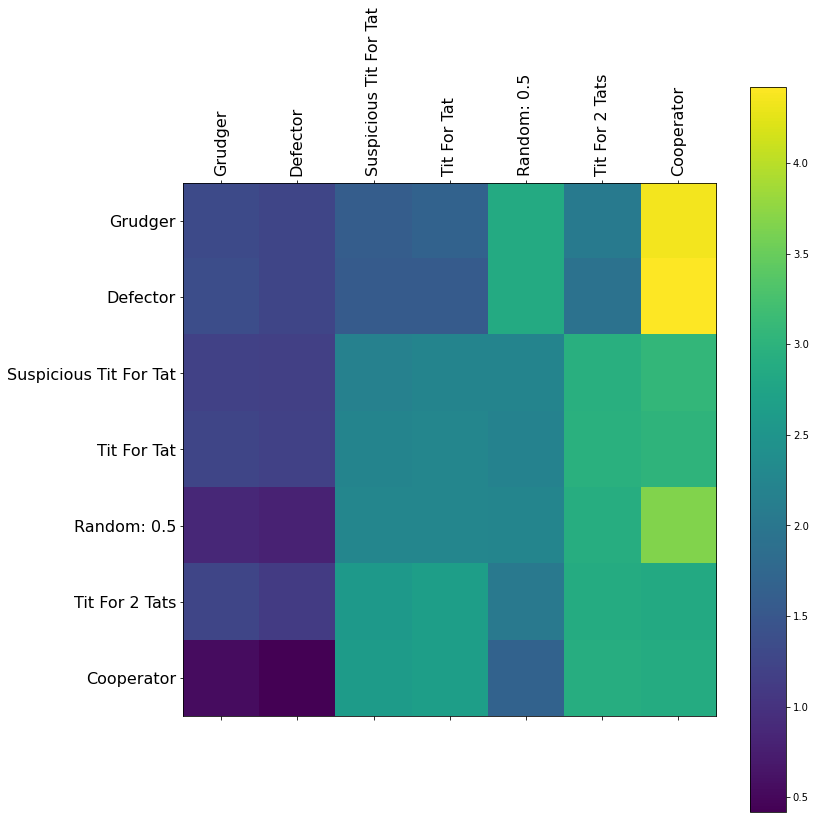

In [9]:

#tourney 1
tChamp = []
totals = []
for d in range(10):

    tournament = axl.Tournament(
     players,
     turns=250,
     repetitions=5,
     seed=d*d,
     noise=0.1
     )

    results = tournament.play()

    tChamp.append(results.ranked_names[0])
    totals.append("Result: " +  str(d)  +  str(results.ranked_names))


for n in totals:
    print(n)

print(len(tChamp))
print(tChamp)
print(most_frequent(tChamp))

plot = axl.Plot(results)

#coloured graph || STRAT VS STRAT 
p = plot.payoff()
p.show()


C:\Users\horns\AppData\Local\Temp/ipykernel_10628/1444693803.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.show()


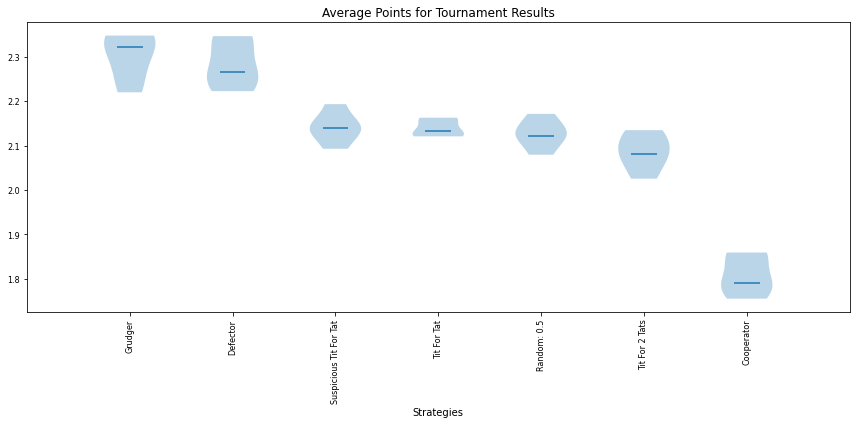

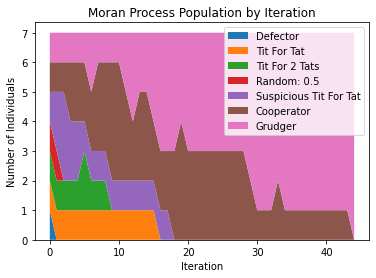

Grudger


In [11]:

#boxplot with average scores and variations 
_, ax = plt.subplots()
title = ax.set_title('Average Points for Tournament Results')
xlabel = ax.set_xlabel('Strategies')
p = plot.boxplot(ax=ax)
p.show()


# initialize list for winners
winners= []



# MORAN 
# Run the tournament experiment j ammount of times  
for j in range(1):
     mp = axl.MoranProcess(players=players, turns=10, seed=j,fitness_transformation=fitness_transformation)
     populations = mp.play()
     mp.winning_strategy_name
     ax = mp.populations_plot()
     winners.append(mp.winning_strategy_name)

     plt.show()

print(most_frequent(winners))







In [15]:

# ONLY FOR COMPARISON WITH ORIGINAL 
"""
Not Needed
plt.figure(figsize=(15, 6)) 
plt.plot((0, 15), (0, 15), color="grey", linestyle="--")  
for original_rank, strategy in enumerate(first_tournament_participants_ordered_by_reported_rank):
    rank = results.ranked_names.index(str(strategy))
    if rank == original_rank:
        symbol = "+"
        plt.plot((rank, rank), (rank, 0), color="red")
    else:
        symbol = "o"
    plt.scatter([rank], [original_rank], marker=symbol, color="black", s=50)  
plt.xticks(
    range(number_of_strategies),
    results.ranked_names,
    rotation=90
)  
plt.ylabel("Reported rank")  
plt.xlabel("Reproduced rank");  
plt.show()
"""

'\nNot Needed\nplt.figure(figsize=(15, 6)) \nplt.plot((0, 15), (0, 15), color="grey", linestyle="--")  \nfor original_rank, strategy in enumerate(first_tournament_participants_ordered_by_reported_rank):\n    rank = results.ranked_names.index(str(strategy))\n    if rank == original_rank:\n        symbol = "+"\n        plt.plot((rank, rank), (rank, 0), color="red")\n    else:\n        symbol = "o"\n    plt.scatter([rank], [original_rank], marker=symbol, color="black", s=50)  \nplt.xticks(\n    range(number_of_strategies),\n    results.ranked_names,\n    rotation=90\n)  \nplt.ylabel("Reported rank")  \nplt.xlabel("Reproduced rank");  \nplt.show()\n'